# Mod_5 Project 

- The goal of this project is to be able to predict whether or not students will successfully complete their course. The dataset come from the Open University Learning Analytics dataset. The dataset contains anonymized data from seven courses over a two-year period from 2013–2014 with terms starting in either February or October. The dataset is about academics and student demographics.

## Cleaning Student Info Dataset

In [ ]:
# to do list thursday
# undestand the confusion matrix look up if I level correraly
# undestand what is the classification report
# https://stats.stackexchange.com/questions/344781/how-to-correctly-read-a-classification-report
# do the PP 
# 

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html to make file smaller

- looking for missing values, rename the target column and use descritive statistisc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df_student_info = pd.read_csv('studentInfo.csv')

In [3]:
df_student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [4]:
df_student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [6]:
df_student_info.shape

(32593, 12)

In [5]:
df_student_info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [6]:
# drop features
df_student_info =  df_student_info.drop(['id_student', 'imd_band'], axis=1)

In [33]:
# rename target feature
df_student_info.rename(columns={"final_result": "target"}, inplace = True)

In [7]:
df_student_info.describe()

,num_of_prev_attempts,studied_credits
count,32593.000000,32593.000000
mean,0.163225,79.758691
std,0.479758,41.071900
min,0.000000,30.000000
25%,0.000000,60.000000
50%,0.000000,60.000000
75%,0.000000,120.000000
max,6.000000,655.000000


In [8]:
df_student_info.nunique()

code_module              7
code_presentation        4
gender                   2
region                  13
highest_education        5
age_band                 3
num_of_prev_attempts     7
studied_credits         61
disability               2
final_result             4
dtype: int64

In [10]:
df_student_info['gender'].value_counts()


M    17875
F    14718
Name: gender, dtype: int64

In [34]:
df_student_info['target'].value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: target, dtype: int64

In [9]:
df_student_info['region'].value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

In [13]:
df_student_info['age_band'].value_counts()

0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

## EDA

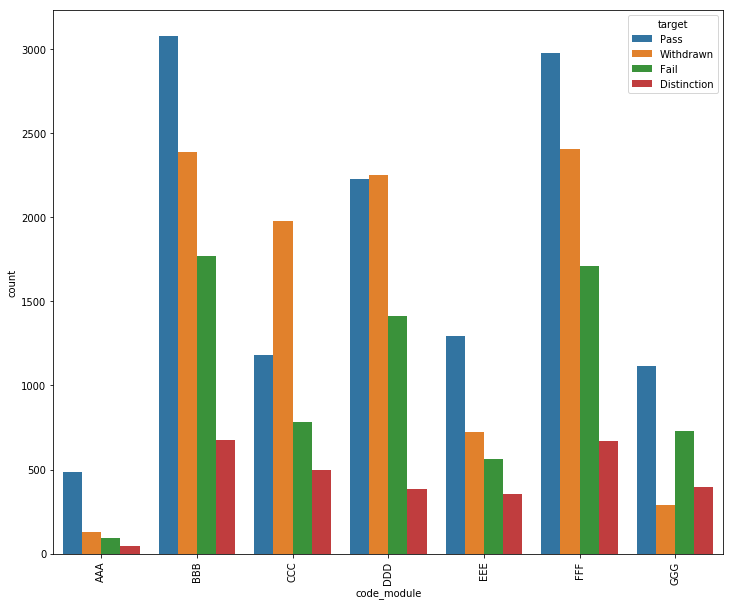

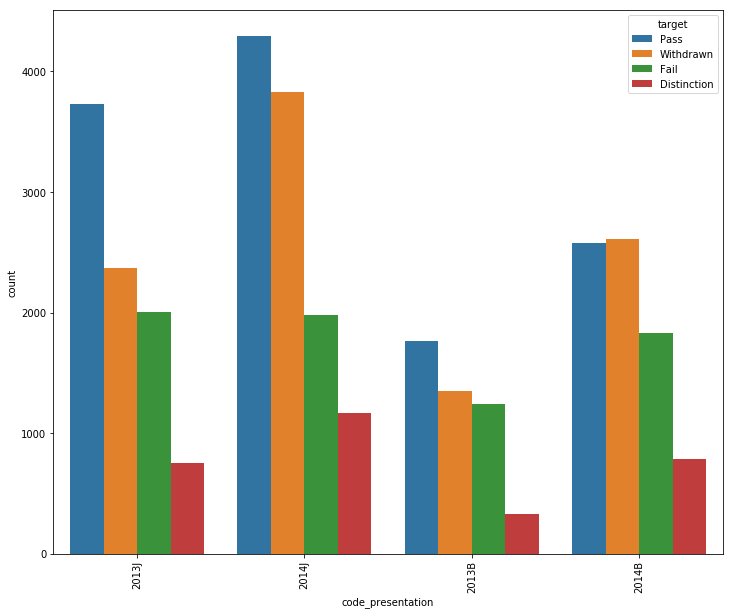

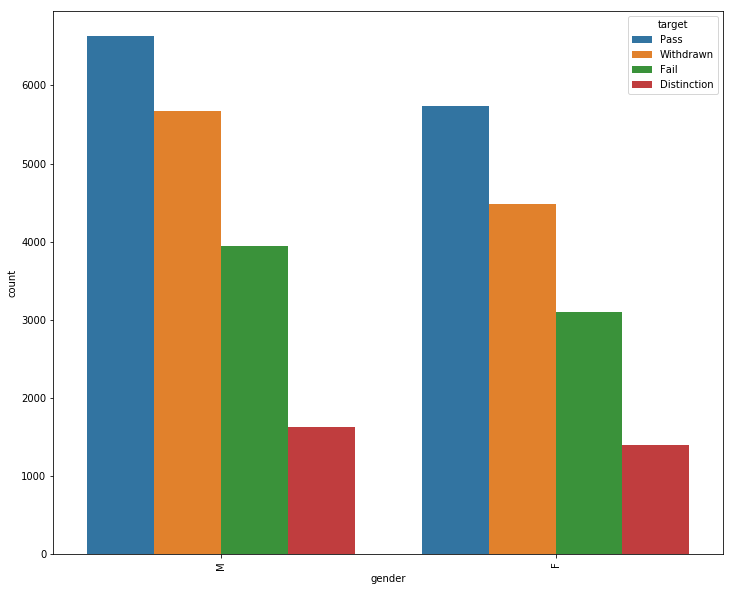

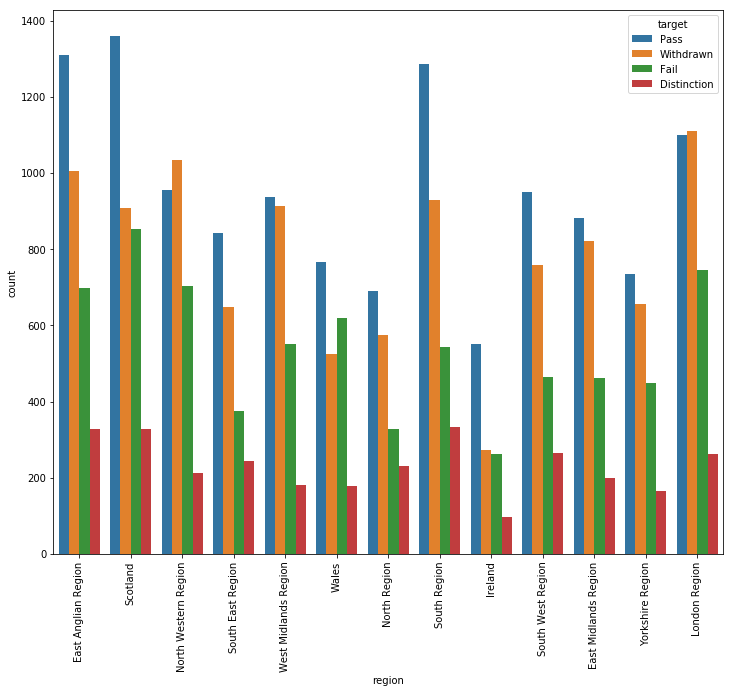

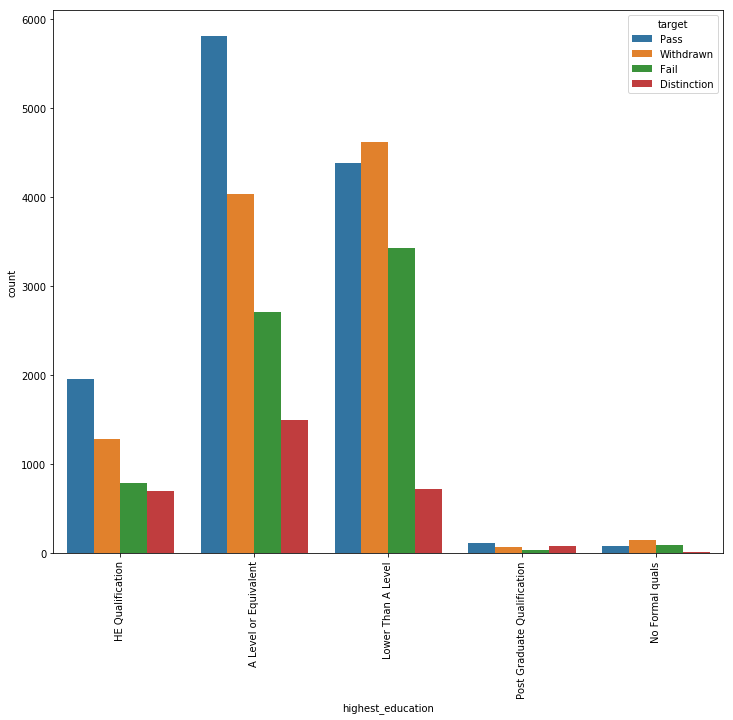

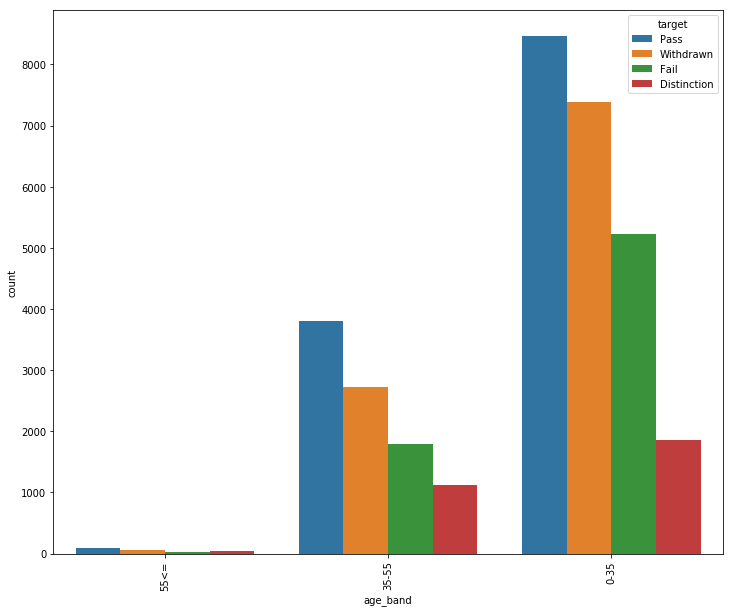

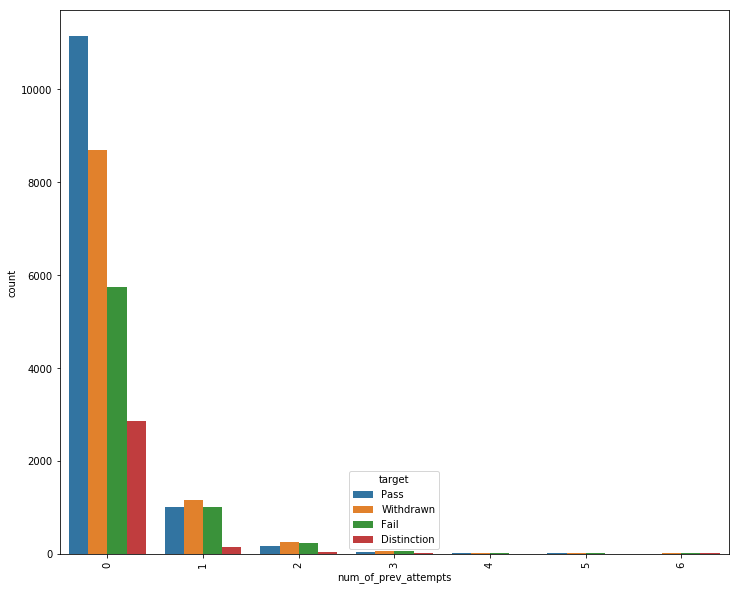

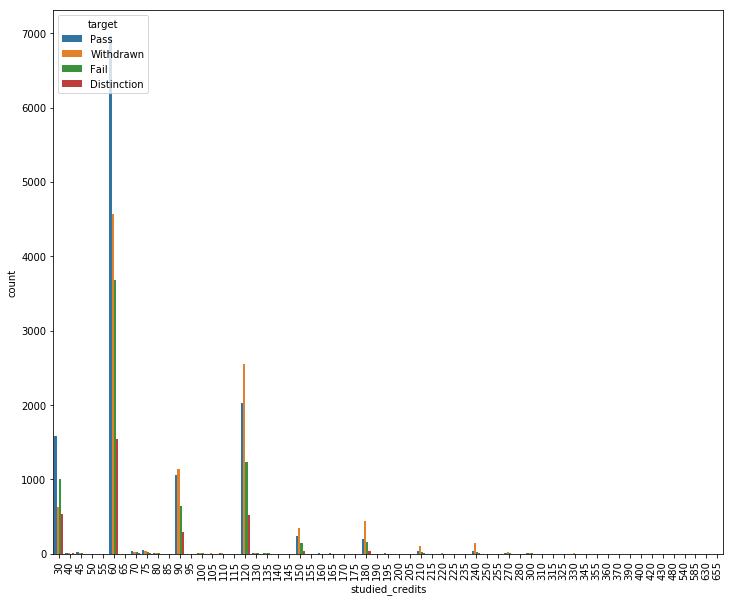

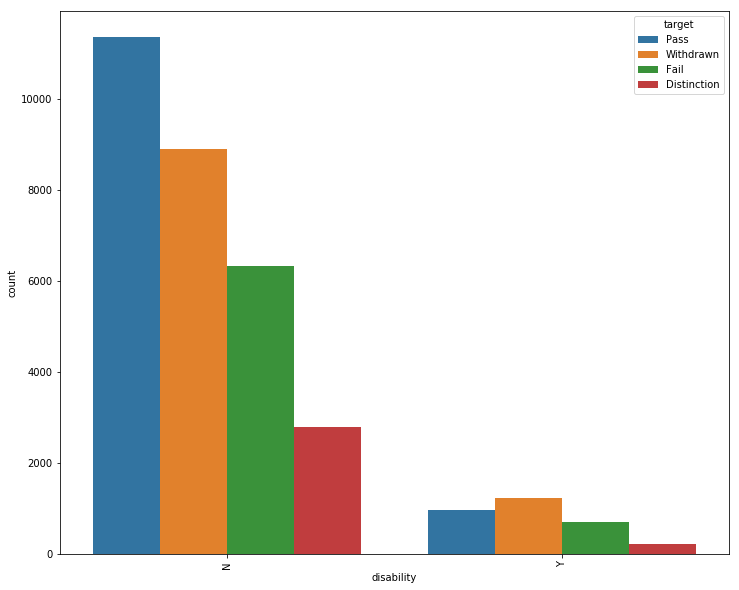

In [35]:
for col in ['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability',]:
    plt.figure(figsize=(12,10))
    sns.countplot(x = col, hue = 'target', 
            data = df_student_info)
    plt.xticks(rotation='vertical')

## Figures of Student Demographics

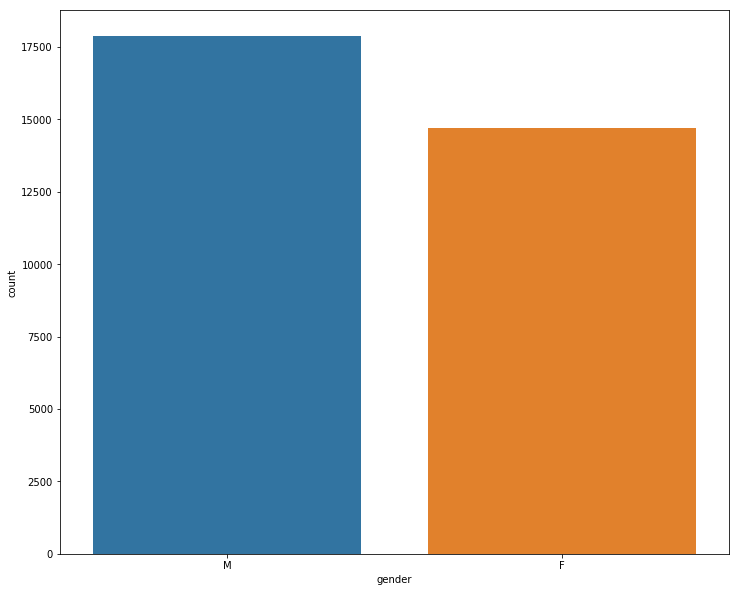

In [10]:
plt.figure(figsize=(12,10))
sns.countplot(df_student_info['gender'])

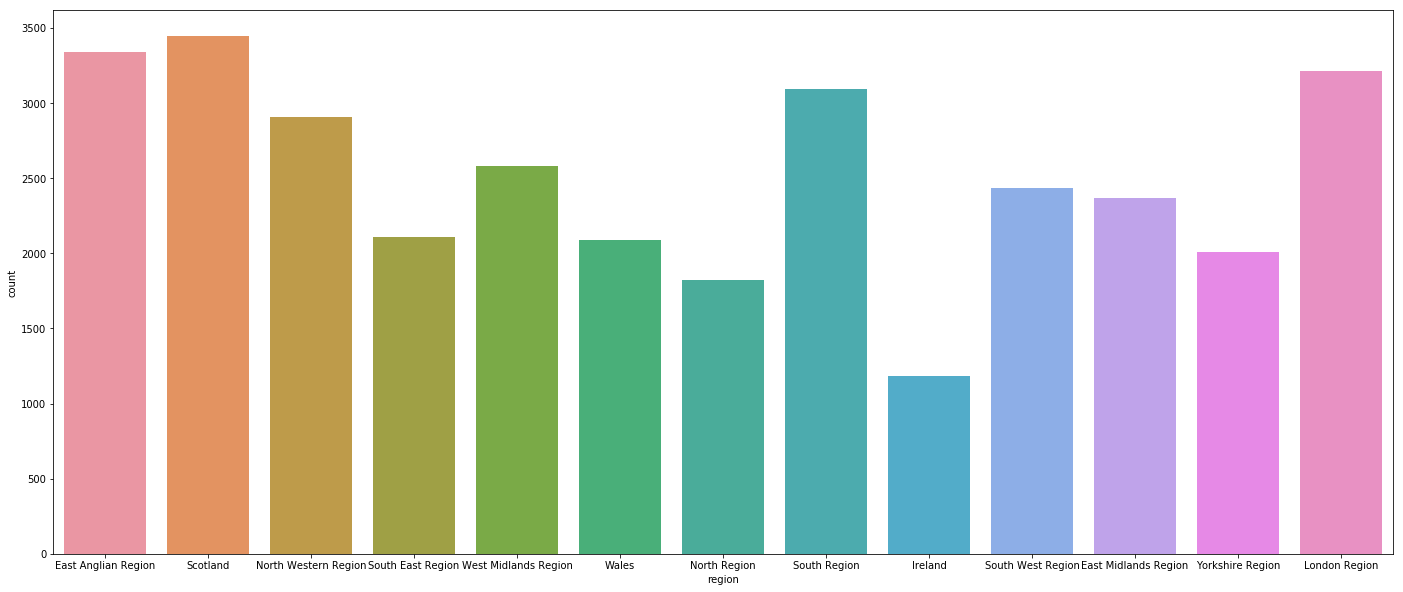

In [15]:
plt.figure(figsize=(24,10))
sns.countplot(df_student_info['region'])

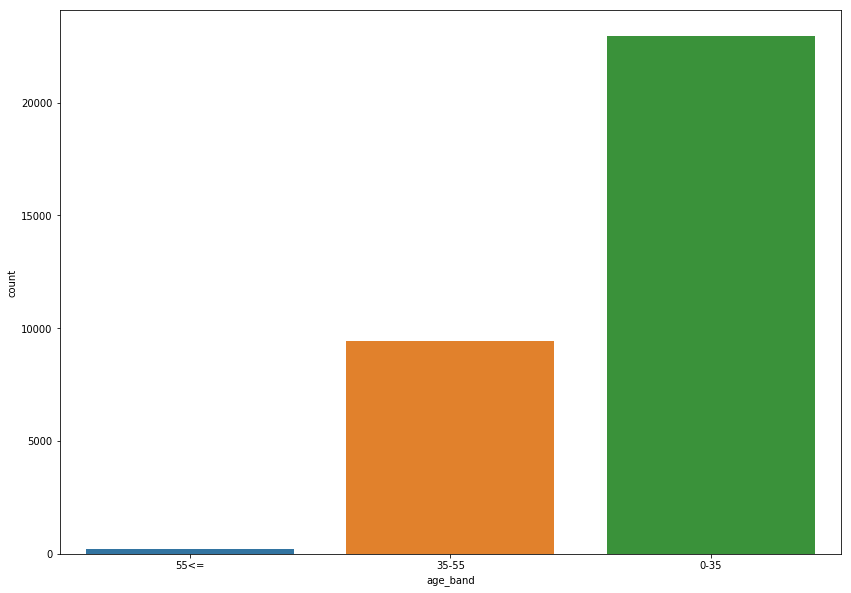

In [17]:
plt.figure(figsize=(14,10))
sns.countplot(df_student_info['age_band'])



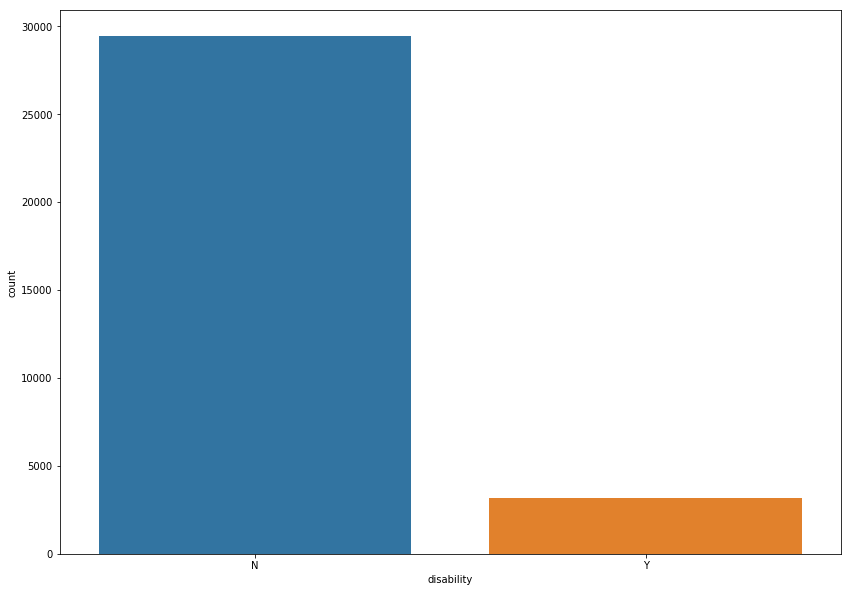

In [18]:
plt.figure(figsize=(14,10))
sns.countplot(df_student_info['disability'])


##  Figures of Student Academics

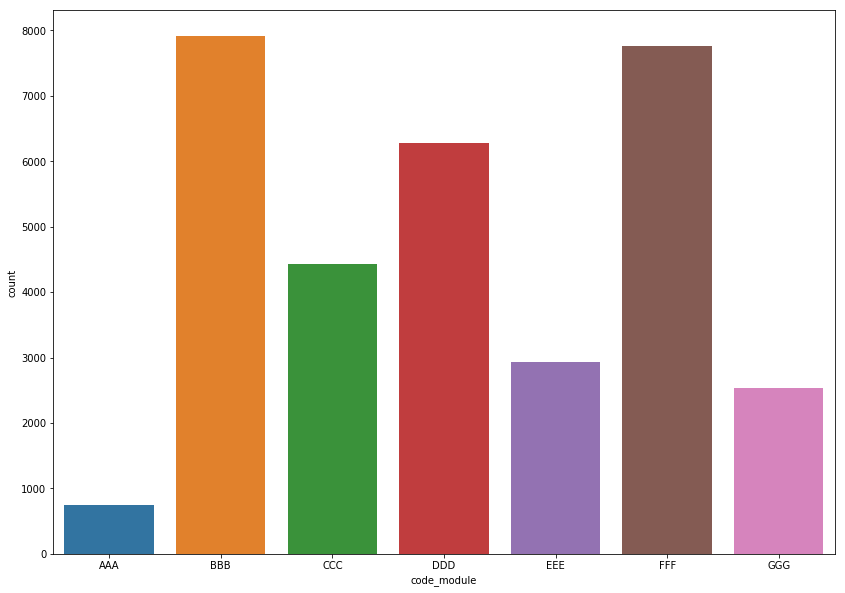

In [20]:
# Name of course, for which student registered
plt.figure(figsize=(14,10))
sns.countplot(df_student_info['code_module'])

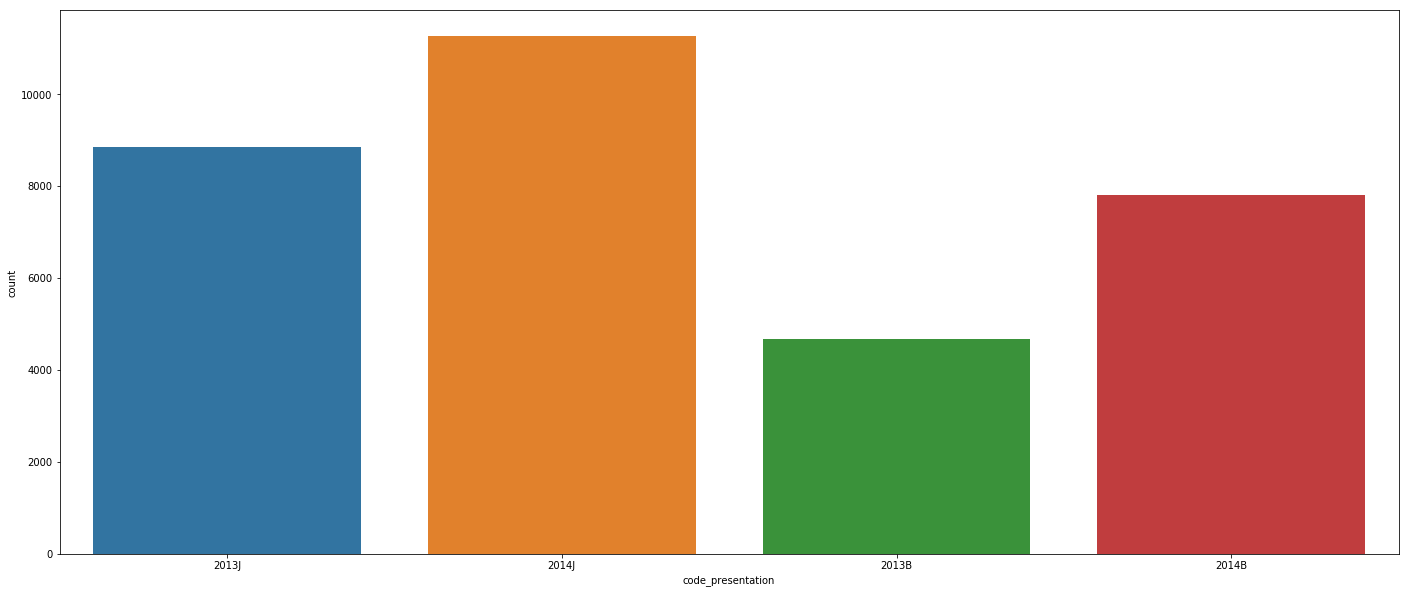

In [21]:
#Name of semester, for which student registered

plt.figure(figsize=(24,10))
sns.countplot(df_student_info['code_presentation'])

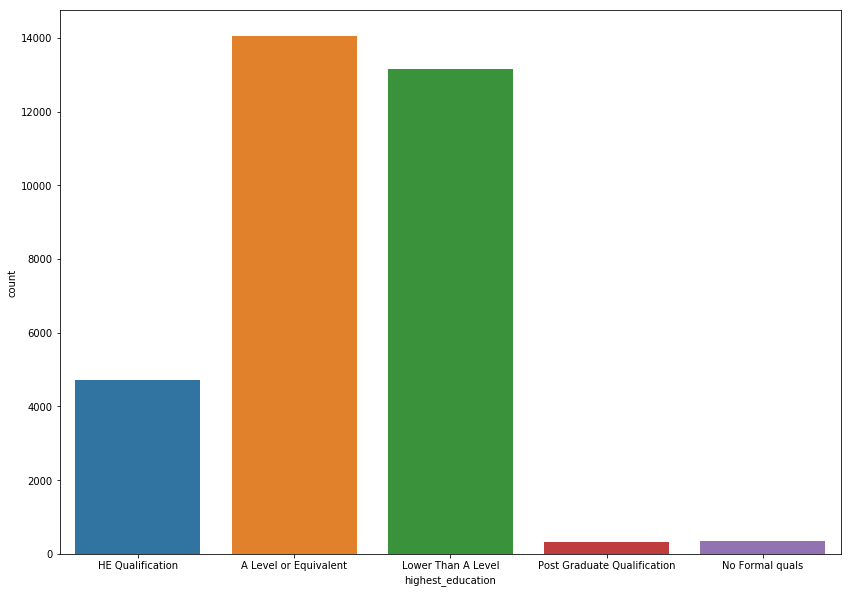

In [22]:
# Highest education student achieved before taking course
plt.figure(figsize=(14,10))
sns.countplot(df_student_info['highest_education'])

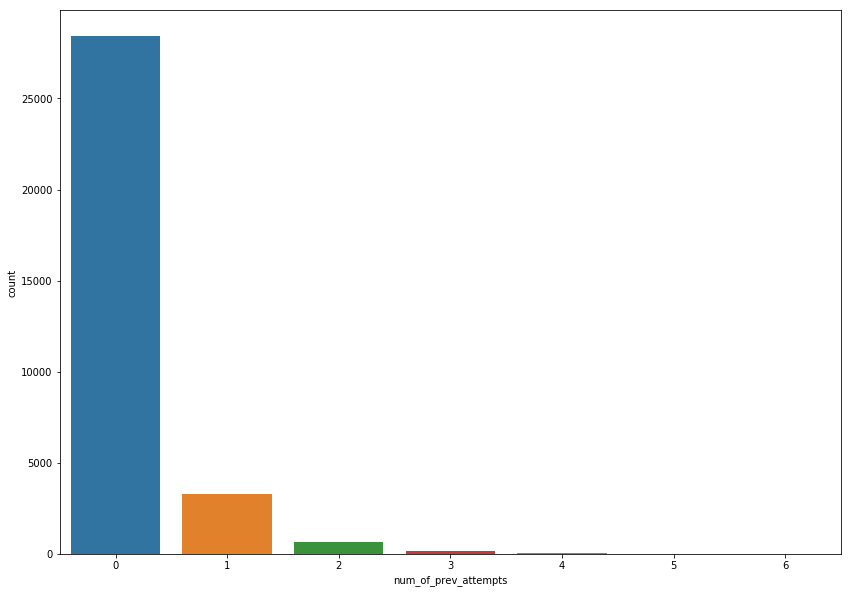

In [23]:
# Number of student previous attempts on the selected course
plt.figure(figsize=(14,10))
sns.countplot(df_student_info['num_of_prev_attempts'])

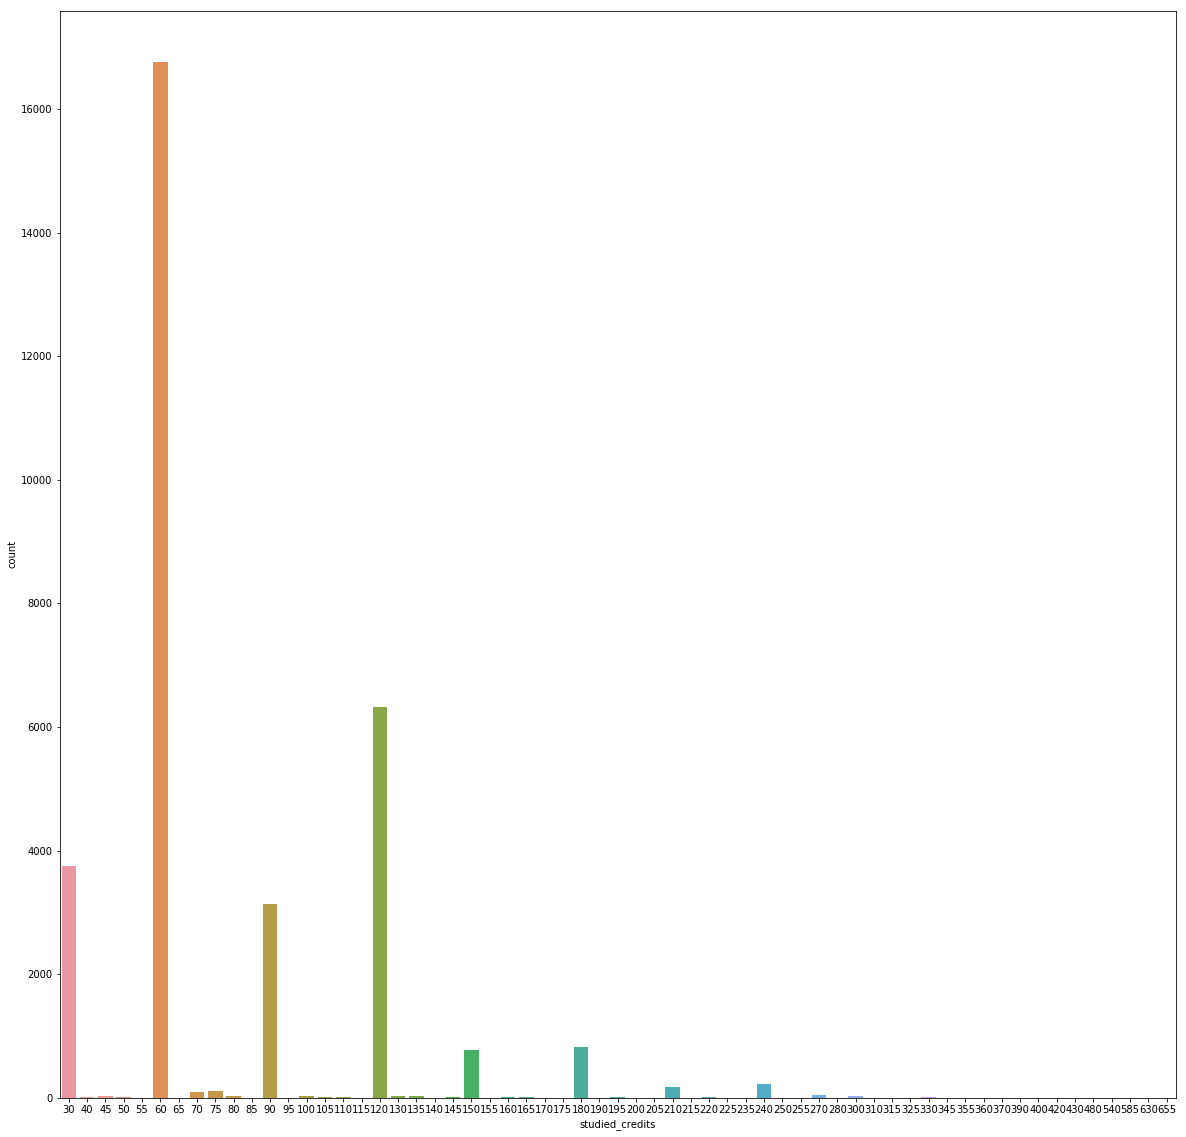

In [28]:
# Total credits student is studing at the Open University during period of the course
plt.figure(figsize=(20,20))
sns.countplot(df_student_info['studied_credits'])

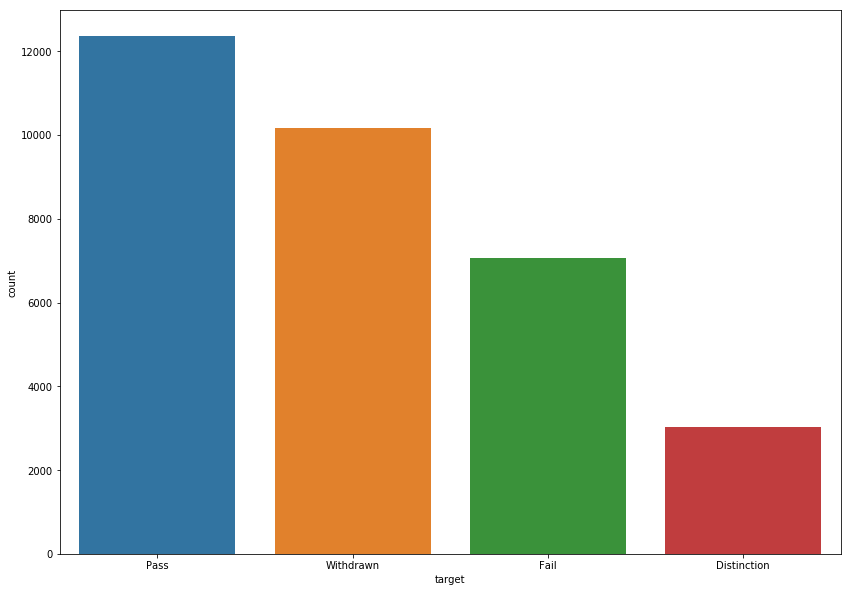

In [36]:
# Student final result in the course
plt.figure(figsize=(14,10))
sns.countplot(df_student_info['target'])